# Hi 
2023.07.19  
let get init

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [196]:
# Let's start by loading the datasets
import pandas as pd

# Load train data
try:
    train_df = pd.read_csv('train.csv')
except:
    train_df = pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv')

# Load store data
try:
    store_df = pd.read_csv('store.csv')
except:
    store_df = pd.read_csv('/mnt/data/store.csv')

# Load test data
try:
    test_df = pd.read_csv('test.csv')
except:
    test_df = pd.read_csv('/kaggle/input/rossmann-store-sales/test.csv')

# Display the first few rows of each dataframe
train_df.head(), store_df.head(), test_df.head()


/var/folders/sb/2gzn9_qx589_ft0jp8q6nbbc0000gn/T/ipykernel_98518/1301930319.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


(   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5  2015-07-31   5263        555     1      1            0   
 1      2          5  2015-07-31   6064        625     1      1            0   
 2      3          5  2015-07-31   8314        821     1      1            0   
 3      4          5  2015-07-31  13995       1498     1      1            0   
 4      5          5  2015-07-31   4822        559     1      1            0   
 
    SchoolHoliday  
 0              1  
 1              1  
 2              1  
 3              1  
 4              1  ,
    Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
 0      1         c          a               1270.0                        9.0   
 1      2         a          a                570.0                       11.0   
 2      3         a          a              14130.0                       12.0   
 3      4         c          c                620.0                  

In [197]:
# Merge the train and store dataframes
train_df = pd.merge(train_df, store_df, on='Store', how='left')

# Merge the test and store dataframes
test_df = pd.merge(test_df, store_df, on='Store', how='left')

# Display the first few rows of each merged dataframe
train_df.head(), test_df.head()


(   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5  2015-07-31   5263        555     1      1            0   
 1      2          5  2015-07-31   6064        625     1      1            0   
 2      3          5  2015-07-31   8314        821     1      1            0   
 3      4          5  2015-07-31  13995       1498     1      1            0   
 4      5          5  2015-07-31   4822        559     1      1            0   
 
    SchoolHoliday StoreType Assortment  CompetitionDistance  \
 0              1         c          a               1270.0   
 1              1         a          a                570.0   
 2              1         a          a              14130.0   
 3              1         c          c                620.0   
 4              1         a          a              29910.0   
 
    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
 0                        9.0                    2008.0       0   
 1  

In [198]:
# Convert 'Date' column to datetime format for both train and test dataframes
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Extract year, month, and day as separate features
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day

test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Day'] = test_df['Date'].dt.day

# Now that we've extracted the necessary information from the 'Date' column, we can drop it
train_df.drop('Date', axis=1, inplace=True)
test_df.drop('Date', axis=1, inplace=True)

# Check the updated dataframes
train_df.head(), test_df.head()


(   Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5   5263        555     1      1            0   
 1      2          5   6064        625     1      1            0   
 2      3          5   8314        821     1      1            0   
 3      4          5  13995       1498     1      1            0   
 4      5          5   4822        559     1      1            0   
 
    SchoolHoliday StoreType Assortment  CompetitionDistance  \
 0              1         c          a               1270.0   
 1              1         a          a                570.0   
 2              1         a          a              14130.0   
 3              1         c          c                620.0   
 4              1         a          a              29910.0   
 
    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
 0                        9.0                    2008.0       0   
 1                       11.0                    2007.0       1   
 2       

In [199]:
# Check for missing values in train and test datasets
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

train_missing[train_missing > 0], test_missing[test_missing > 0]


(CompetitionDistance            2642
 CompetitionOpenSinceMonth    323348
 CompetitionOpenSinceYear     323348
 Promo2SinceWeek              508031
 Promo2SinceYear              508031
 PromoInterval                508031
 dtype: int64,
 Open                            11
 CompetitionDistance             96
 CompetitionOpenSinceMonth    15216
 CompetitionOpenSinceYear     15216
 Promo2SinceWeek              17232
 Promo2SinceYear              17232
 PromoInterval                17232
 dtype: int64)

In [200]:
# Fill missing values

# For 'CompetitionDistance', we fill missing values with the median distance
train_df['CompetitionDistance'].fillna(train_df['CompetitionDistance'].median(), inplace=True)
test_df['CompetitionDistance'].fillna(test_df['CompetitionDistance'].median(), inplace=True)

# For 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear', we fill missing values with the most frequent value
train_df['CompetitionOpenSinceMonth'].fillna(train_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
train_df['CompetitionOpenSinceYear'].fillna(train_df['CompetitionOpenSinceYear'].mode()[0], inplace=True)

test_df['CompetitionOpenSinceMonth'].fillna(test_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
test_df['CompetitionOpenSinceYear'].fillna(test_df['CompetitionOpenSinceYear'].mode()[0], inplace=True)

# For 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', we fill missing values with zero
promo_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
train_df[promo_cols] = train_df[promo_cols].fillna(0)
test_df[promo_cols] = test_df[promo_cols].fillna(0)

# For 'Open' column in test dataset, fill missing values with 1
test_df['Open'].fillna(1, inplace=True)

# Check if there are any missing values left
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

train_missing[train_missing > 0], test_missing[test_missing > 0]


(Series([], dtype: int64), Series([], dtype: int64))

In [201]:
# One-hot encode 'StateHoliday', 'StoreType', 'Assortment' columns
train_df = pd.get_dummies(train_df, columns=['StateHoliday', 'StoreType', 'Assortment'])
test_df = pd.get_dummies(test_df, columns=['StateHoliday', 'StoreType', 'Assortment'])

# Handle 'PromoInterval' column
# First, let's see what unique values it has
print("Unique values in 'PromoInterval' column:")
print(train_df['PromoInterval'].unique())

# It seems like 'PromoInterval' contains either 0 (for no promotion) or a string with comma-separated months.
# Let's create separate binary columns for each possible month in the 'PromoInterval'

# Months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# For each month, create a new column in train and test dataframes
for month in months:
    train_df['PromoInterval_' + month] = train_df['PromoInterval'].apply(lambda x: 1 if month in str(x) else 0)
    test_df['PromoInterval_' + month] = test_df['PromoInterval'].apply(lambda x: 1 if month in str(x) else 0)

# Now that we've extracted the necessary information from the 'PromoInterval' column, we can drop it
train_df.drop('PromoInterval', axis=1, inplace=True)
test_df.drop('PromoInterval', axis=1, inplace=True)

# Check the updated dataframes
train_df.head(), test_df.head()


Unique values in 'PromoInterval' column:
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


(   Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
 0      1          5   5263        555     1      1              1   
 1      2          5   6064        625     1      1              1   
 2      3          5   8314        821     1      1              1   
 3      4          5  13995       1498     1      1              1   
 4      5          5   4822        559     1      1              1   
 
    CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
 0               1270.0                        9.0                    2008.0   
 1                570.0                       11.0                    2007.0   
 2              14130.0                       12.0                    2006.0   
 3                620.0                        9.0                    2009.0   
 4              29910.0                        4.0                    2015.0   
 
    ...  PromoInterval_Mar  PromoInterval_Apr  PromoInterval_May  \
 0  ...                  0  

In [202]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler
scaler = MinMaxScaler()

# List of numerical columns
num_cols = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day']

# Apply the scaler to the numerical columns
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols]) # Note: we use transform() here, not fit_transform()

# Check the updated dataframes
train_df.head(), test_df.head()


(   Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
 0      1          5   5263        555     1      1              1   
 1      2          5   6064        625     1      1              1   
 2      3          5   8314        821     1      1              1   
 3      4          5  13995       1498     1      1              1   
 4      5          5   4822        559     1      1              1   
 
    CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
 0             0.016482                   0.727273                  0.939130   
 1             0.007252                   0.909091                  0.930435   
 2             0.186050                   1.000000                  0.921739   
 3             0.007911                   0.727273                  0.947826   
 4             0.394119                   0.272727                  1.000000   
 
    ...  PromoInterval_Mar  PromoInterval_Apr  PromoInterval_May  \
 0  ...                  0  

In [203]:
# Separate target variable 'Sales' from the rest of the training dataset
X_train = train_df.drop(['Sales', 'Customers'], axis=1) # We also drop 'Customers' as it's not present in the test dataset
y_train = train_df['Sales']

# Ensure that train and test datasets have the same columns
missing_cols = set(X_train.columns) - set(test_df.columns)
for c in missing_cols:
    test_df[c] = 0
test_df = test_df[X_train.columns]

# Check the shapes of the datasets
X_train.shape, y_train.shape, test_df.shape


((1017209, 38), (1017209,), (41088, 38))

# Deep Leaning


In [209]:
#imports
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Device

In [210]:

import torch
import subprocess

def GPU():
    if torch.cuda.is_available() == True:
        device = 'cuda'
        templist = [1, 2, 3]
        templist = torch.FloatTensor(templist).to(device)
        print("Cuda torch working : ", end="")
        print(templist.is_cuda)
        print("current device no. : ", end="")
        print(torch.cuda.current_device())
        print("GPU device count : ", end="")
        print(torch.cuda.device_count())
        print("GPU name : ", end="")
        print(torch.cuda.get_device_name(0))
        print("device : ", device)
        # Execute the nvidia-smi command using subprocess
        try:
            output = subprocess.check_output(['nvidia-smi']).decode('utf-8')
            print("nvidia-smi output:")
            print(output)
        except (subprocess.CalledProcessError, FileNotFoundError) as e:
            print("Error executing nvidia-smi command:", str(e))
    elif torch.backends.mps.is_available() == True:
        print("Apple device detected\nActivating Apple Silicon GPU")
        device = torch.device("mps")
    else:
        print("cant use gpu , activating cpu")
        device = 'cpu'

    return device
device = GPU()
device = 'cpu'
print(device)

Apple device detected
Activating Apple Silicon GPU
cpu


In [211]:
# Convert the dataframes into PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device) # reshape to (n_samples, 1)
X_test_tensor = torch.tensor(test_df.values, dtype=torch.float32).to(device)

In [212]:
# Split data into training and validation
dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


In [213]:
# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [214]:
# Define the model architecture
model = nn.Sequential(
    nn.Linear(X_train_tensor.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
).to(device) # move the model to the device

In [215]:
import torch.nn.functional as F


class FFN(nn.Module):
    def __init__(self, input_dim):
        super(FFN, self).__init__()
        
        self.layer1 = nn.Linear(input_dim, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)
        
        self.dropout = nn.Dropout(0.2)
        self.batchnorm1 = nn.BatchNorm1d(256)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        self.batchnorm4 = nn.BatchNorm1d(32)
        
    def forward(self, x):
        x = F.relu(self.batchnorm1(self.layer1(x)))
        x = self.dropout(x)
        x = F.relu(self.batchnorm2(self.layer2(x)))
        x = self.dropout(x)
        x = F.relu(self.batchnorm3(self.layer3(x)))
        x = self.dropout(x)
        x = F.relu(self.batchnorm4(self.layer4(x)))
        x = self.dropout(x)
        x = self.output_layer(x)
        return x
model = FFN(X_train_tensor.shape[1]).to(device)

In [216]:
# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [217]:
# Store losses for plot
train_losses = []
val_losses = []


# Placeholder for best validation loss
best_val_loss = float('inf')

# Loop

1. train
2. calculate val loss while torch no grad
3. if val loss is smaller , save model
4. print train val loss

In [218]:
import time

# Training loop
start_time = time.time()  # Start time
NB_EPOCH  = 10
for epoch in range(NB_EPOCH):
    model.train()
    train_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)

    train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item() * data.size(0)
    val_loss = val_loss / len(val_loader.dataset)
    val_losses.append(val_loss)

    elapsed_time = time.time() - start_time  # Elapsed time
    epochs_done = epoch + 1
    epochs_remaining = NB_EPOCH - epochs_done
    avg_time_per_epoch = elapsed_time / epochs_done
    remaining_time = avg_time_per_epoch * epochs_remaining

    print('Epoch: {} \tTraining Loss: {:.2f} \tValidation Loss: {:.2f} \tRemaining Time: {:f}s'.format(epoch + 1, train_loss, val_loss, remaining_time))

    if val_loss < best_val_loss:
        print('Val loss decreased ({:.1} --> {:.1f}). Saving model'.format(best_val_loss, val_loss))
        torch.save(model.state_dict(), 'model.pt')
        best_val_loss = val_loss

Epoch: 1 	Training Loss: 23546138.909730 	Validation Loss: 5963204.885063 	Remaining Time: 303.48s
Validation loss decreased (inf --> 5963204.885063). Saving model ...
Epoch: 2 	Training Loss: 6447005.410252 	Validation Loss: 5642971.684215 	Remaining Time: 274.94s
Validation loss decreased (5963204.885063 --> 5642971.684215). Saving model ...
Epoch: 3 	Training Loss: 6277082.157996 	Validation Loss: 5574030.597733 	Remaining Time: 239.30s
Validation loss decreased (5642971.684215 --> 5574030.597733). Saving model ...
Epoch: 4 	Training Loss: 6151766.951047 	Validation Loss: 5526859.512367 	Remaining Time: 204.44s
Validation loss decreased (5574030.597733 --> 5526859.512367). Saving model ...
Epoch: 5 	Training Loss: 6039672.686556 	Validation Loss: 5564565.218740 	Remaining Time: 172.81s
Epoch: 6 	Training Loss: 5922771.565764 	Validation Loss: 5261788.702318 	Remaining Time: 139.68s
Validation loss decreased (5526859.512367 --> 5261788.702318). Saving model ...
Epoch: 7 	Training Los

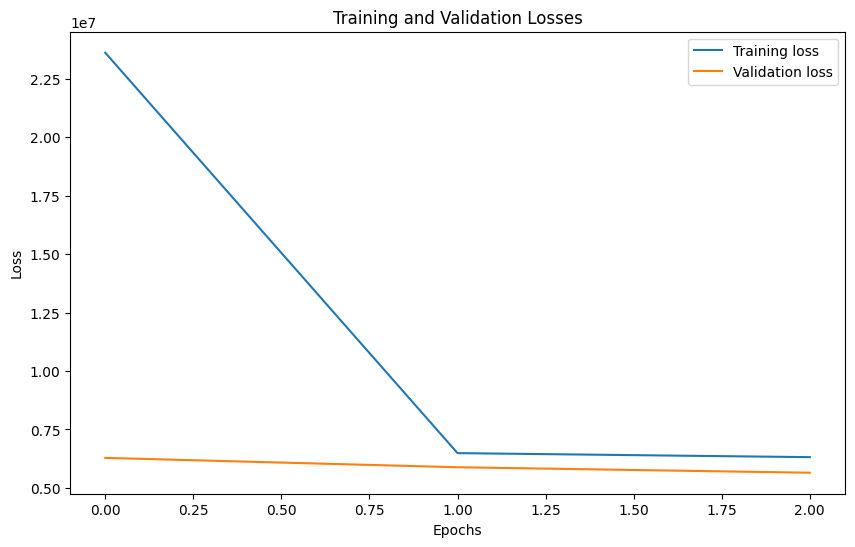

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_graph.png')
plt.show()

In [ ]:
# Load the best model
model.load_state_dict(torch.load('model.pt'))

# Switch model to the evaluation mode
model.eval()

# Make predictions on the test data
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()

# Create a submission dataframe
submission_df = pd.DataFrame({'Id': test_df.index + 1, 'Sales': predictions.flatten()})

# Save the submission dataframe as a csv file
submission_df.to_csv('sample_submission.csv', index=False)